In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [3]:
data = pd.read_csv('../datasets/marketing_sales_data.csv')
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


<Axes: xlabel='TV', ylabel='Sales'>

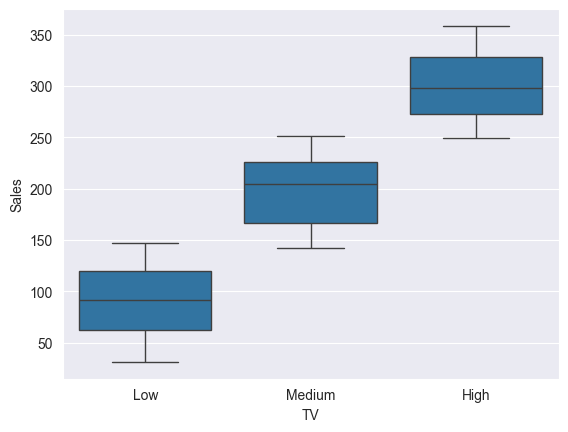

In [7]:
# creating a boxplot with TV and Sales.
sns.boxplot(x='TV', y='Sales', data=data)

<Axes: xlabel='Influencer', ylabel='Sales'>

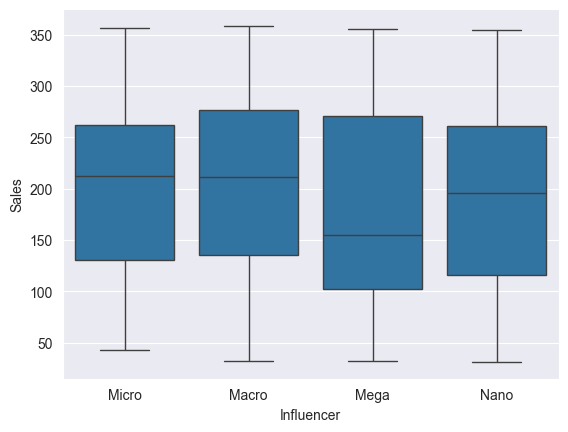

In [8]:
# creating a boxplot with Influencer and Sales.
sns.boxplot(x='Influencer', y='Sales', data=data)

In [9]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

#### model building

In [12]:
ols_formula = "Sales ~ C(TV)"

OLS = ols(ols_formula, data)

model = OLS.fit()

results = model.summary()

results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Fri, 22 Aug 2025   Prob (F-statistic):          8.81e-256
Time:                        20:09:39   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### checking model assumptions

##### normality assumption

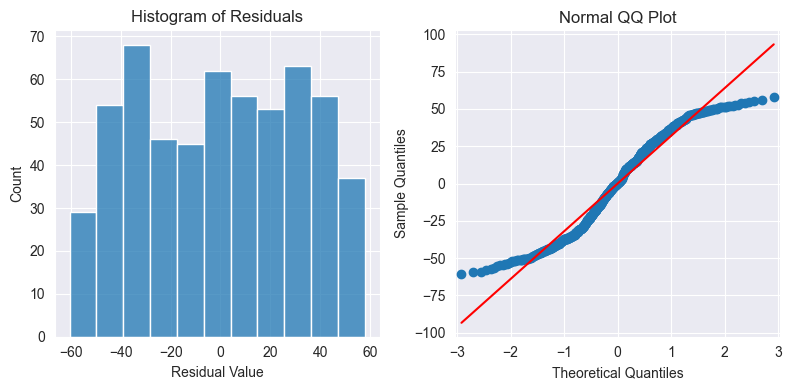

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (8,4))

residuals = model.resid
sns.histplot(residuals, ax = axes[0])
axes[0].set_xlabel("Residual Value")
axes[0].set_title("Histogram of Residuals")

sm.qqplot(residuals, line='s', ax = axes[1])
axes[1].set_title("Normal QQ Plot")

plt.tight_layout()


the normality assumption is not met considering there is not a normal distribution of residual values. but I will assume that the assumption is met in order to continue.

##### homoscedeasticity assumption

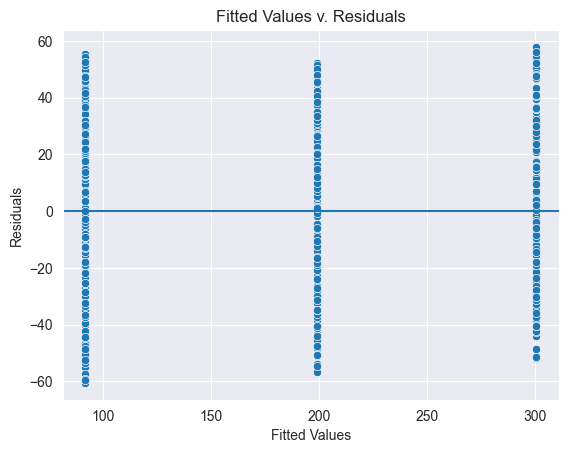

In [32]:
fig = sns.scatterplot(x=model.fittedvalues, y=model.resid)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted Values v. Residuals")
plt.show()

#### performing a one-way anova test

In [34]:
sm.stats.anova_lm(model, typ=2)

,df,sum_sq,mean_sq,F,PR(>F)
C(TV),2.0,4.052692e+06,2.026346e+06,1971.455737,8.805550e-256
Residual,566.0,5.817589e+05,1.027843e+03,NaN,NaN


In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = data["Sales"], groups = data["TV"], alpha = 0.05)
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True
